# Projeto 3 - Custo do site

## Obtendo e tratando os dados

In [687]:
# imports gerais
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [688]:
# carregando os dados com pandas
url = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
data = pd.read_csv(url)
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [689]:
# renomeando as colunas
mapa = {
    'expected_hours': 'horas_esperadas',
    'price': 'preco',
    'unfinished': 'nao_finalizado'
}
data.rename(columns = mapa, inplace=True)
data.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [690]:
# criando uma coluna finalizado (inverso da 'nao_finalizado')
trocar = {
    0: 1,
    1: 0
}
data['finalizado'] = data.nao_finalizado.map(trocar)
data.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [691]:
# chegando o final do dataframe
data.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


## Plotando e explorando os dados

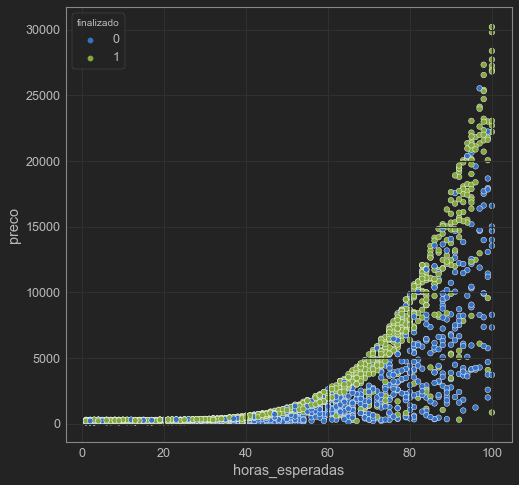

In [692]:
# plotando scatterplot com seaborn
ax = sns.scatterplot(x = 'horas_esperadas', y= 'preco', data=data, hue= 'finalizado')
ax.figure.set_size_inches(8,8)

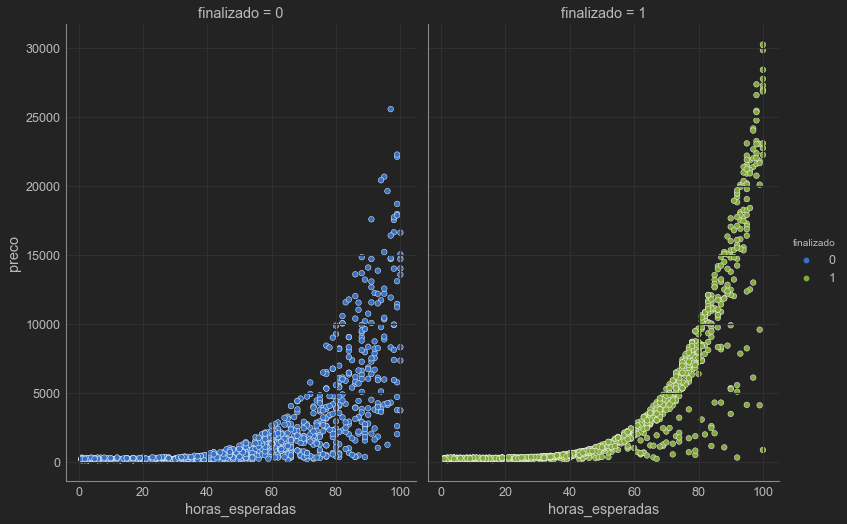

In [693]:
# plotando relplot com seaborn
ax = sns.relplot(x = 'horas_esperadas', y= 'preco', data=data, col= 'finalizado', hue= 'finalizado')
ax.figure.set_size_inches(12,8)

## Criando um modelo de AM

In [694]:
# criando as variaveis dependentes e atributos
X = data[['horas_esperadas', 'preco']]
y = data['finalizado']

In [695]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5

treino_x, teste_x, treino_y, teste_y = train_test_split(X, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 56.11%


C:\Users\guilh\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [696]:
# algoritmo de teste baseado apenas em SIM (1) - baseline
previsoes_teste_1 = np.ones(540)
acuracia2 = accuracy_score(y_true= teste_y, y_pred= previsoes_teste_1)
print(f'Treinamos com {len(treino_x)} e testamos com {len(teste_x)}')
print(f'A acurácia foi {acuracia2*100:.2f}%')

Treinamos com 1617 e testamos com 540
A acurácia foi 52.59%


## Analizando as classificações para melhorar o modelo

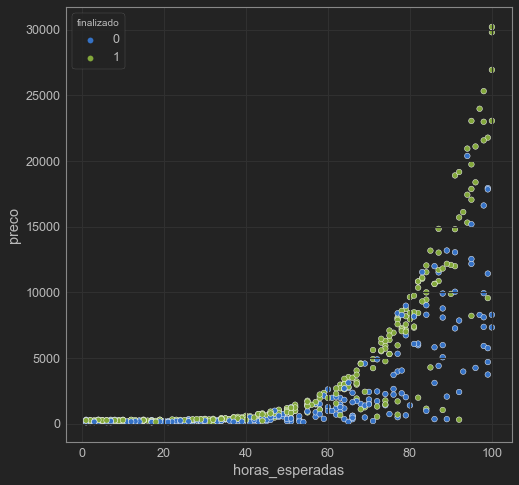

In [697]:
# analizando teste x
ax = sns.scatterplot(x = 'horas_esperadas', y= 'preco', data=teste_x, hue= teste_y)
ax.figure.set_size_inches(8,8)

### Plotando o modelo no seaborn

In [698]:
# pegando os valores minimos e maximos de X e Y
x_min = teste_x['horas_esperadas'].min()
x_max = teste_x['horas_esperadas'].max()

y_min = teste_x['preco'].min()
y_max = teste_x['preco'].max()

print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [699]:
# definindo o numero de 'pixels/pontos' a serem analizados pelo modelo no grafico plotado
pixels = 100

# inicio, fim, passo
x_min, x_max, (x_max - x_min) / pixels

(1, 100, 0.99)

In [700]:
# array de pontos de teste em X
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels )

# array de pontos de teste em Y
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

# realizar o mesh do eixo_x com eixo_y utilizando numpy
xx, yy = np.meshgrid(eixo_x, eixo_y)

# cria uma matriz com posição x e y através dos pontos do eixo x e eixo y
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

### Utilizando o modelo linear para predizer todos os pontos 

In [701]:
Z = modelo.predict(pontos)
Z.shape

(10000,)

In [702]:
xx.shape

(100, 100)

In [703]:
# redimensionar Z para que tenha o mesmo tamanho de xx
Z.reshape(xx.shape)

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [704]:
Z = Z.reshape(xx.shape)

<function matplotlib.pyplot.show(close=None, block=None)>

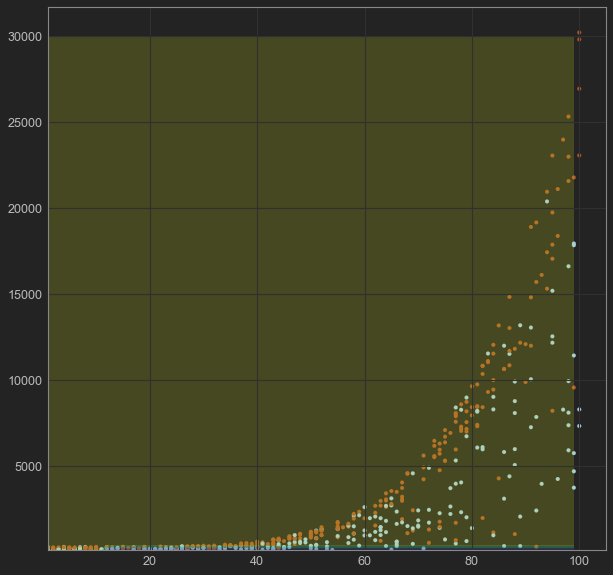

In [705]:
ax = plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s= 15, cmap= 'Paired' )
ax.figure.set_size_inches(10,10)
plt.contourf(xx, yy, Z, alpha=0.2) #cria o contorno do modelo entre xx e yy
plt.show

## Utilizando outro estimador para predizer os pontos (SVC)

In [706]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(X, y,
                                                        test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC(gamma= 'auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 59.07%


<function matplotlib.pyplot.show(close=None, block=None)>

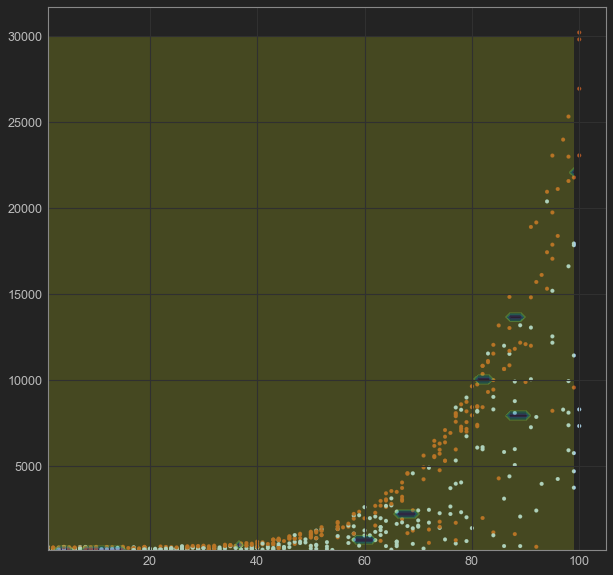

In [707]:
# pegando os valores minimos e maximos de X e Y
x_min = teste_x['horas_esperadas'].min()
x_max = teste_x['horas_esperadas'].max()

y_min = teste_x['preco'].min()
y_max = teste_x['preco'].max()

# definindo o numero de 'pixels/pontos' a serem analizados pelo modelo no grafico plotado
pixels = 100

# inicio, fim, passo
x_min, x_max, (x_max - x_min) / pixels

# array de pontos de teste em X
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels )

# array de pontos de teste em Y
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

# realizar o mesh do eixo_x com eixo_y utilizando numpy
xx, yy = np.meshgrid(eixo_x, eixo_y)

# cria uma matriz com posição x e y através dos pontos do eixo x e eixo y
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

ax = plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s= 15, cmap= 'Paired' )
ax.figure.set_size_inches(10,10)
plt.contourf(xx, yy, Z, alpha=0.2) #cria o contorno do modelo entre xx e yy
plt.show

### Reescalando o modelo para uma mesma faixa

In [708]:
# utilizando o StandardScales para reescalar os eixos
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(X, y,
                                                        test_size = 0.25,
                                                         stratify = y)

# valores de treino_x e teste_x serão reescalados
# atualmente os valores possuem uma faixa muito diferente de valores 0-100 e 0-30.000

# instancia o modelo de reescala
scaler = StandardScaler()
# ajusta o modelo com "treino_x"
scaler.fit(raw_treino_x)
# reescala treino_x e teste_x
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
modelo = SVC(gamma= 'auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


### Reajustando alguns valores para a plotagem

In [709]:
# verificando o modelo criado treino_x
treino_x

array([[-1.20810685, -0.58850785],
       [-0.25992095, -0.48069545],
       [ 1.46086087,  0.13548927],
       ...,
       [-0.57598292, -0.58492075],
       [ 1.21503489,  0.45294796],
       [ 1.1799169 ,  1.18670998]])

`treino_x` e `teste_x` não mais são _pandas_ _dataframes_, mas sim `arrays`, de modo que precisamos ajustar os valores nas formulas para que x_min e x_max no quadro abaixo continuem funcionais

In [710]:
# """
#     OLD
# x_min = teste_x['horas_esperadas'].min()
# x_max = teste_x['horas_esperadas'].max()
# y_min = teste_x['preco'].min()
# y_max = teste_x['preco'].max()

#     NEW
# data_x = treino_x[:,0]
# data_y = treino_x[:,1]
# x_min = data_x.min()
# x_max = data_x.max()
# y_min = data_y.min()
# y_max = data_y.max()
# """

In [711]:
# selecionando somente os valores da coluna 0 de um array
treino_x[:,0]

array([-1.20810685, -0.25992095,  1.46086087, ..., -0.57598292,
        1.21503489,  1.1799169 ])

In [712]:
# criando eixo x (horas esperadas) e eixo y (preco)
data_x = teste_x[:,0]
data_y = teste_x[:,1]

# pegando os valores minimos e maximos de X e Y
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

<function matplotlib.pyplot.show(close=None, block=None)>

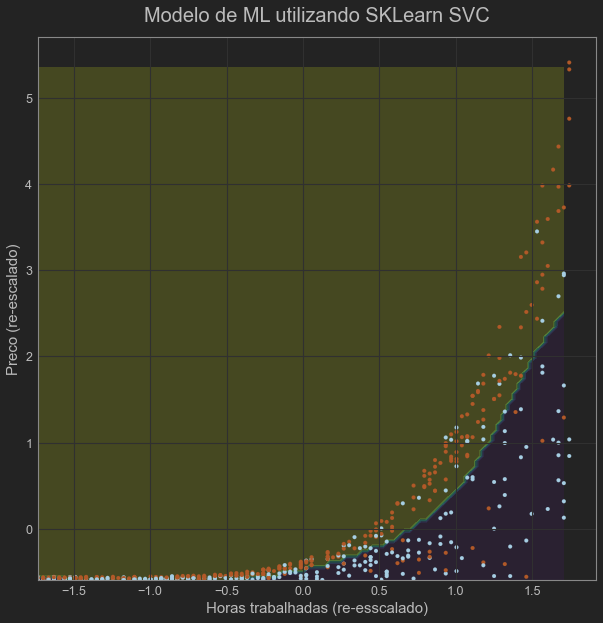

In [713]:
# definindo o numero de 'pixels/pontos' a serem analizados pelo modelo no grafico plotado
pixels = 100

# inicio, fim, passo
x_min, x_max, (x_max - x_min) / pixels

# array de pontos de teste em X
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels )

# array de pontos de teste em Y
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

# realizar o mesh do eixo_x com eixo_y utilizando numpy
xx, yy = np.meshgrid(eixo_x, eixo_y)

# cria uma matriz com posição x e y através dos pontos do eixo x e eixo y
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2) #cria o contorno do modelo entre xx e yy
plt.title('Modelo de ML utilizando SKLearn SVC', fontsize=20, pad=15)
plt.xlabel('Horas trabalhadas (re-esscalado)', fontsize=15)
plt.ylabel('Preco (re-escalado)', fontsize=15)
ax = plt.scatter(data_x, data_y, c=teste_y, s= 15, cmap= 'Paired' )
ax.figure.set_size_inches(10,10)
plt.show

> Key Ideas
<br>
- Utilizando o SVC, o modelo teve um encaixe muito supeior nos dados, conforme pode ser visto no plot, do que o teste anterior com o modelo Linear
- Apesar do melhor encaixe, a acuracia enta foi de 66,58%. Valor satisfatório apenas para fins didaticos